# Time series plot examples
Written by:
Jeffrey Yau, PyData NYC 2017, "Timer Series Forecasting using Statistical and Machine Learning Models"

Stolen by:
Brad Deutsch, Schireson Associates Ltd. 2018-02-19

In [1]:
# import packages

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.graphics.tsaplots as tsa

C:\Anaconda2\envs\py3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# define plotting function

def tsplot2(y, title, lags=None, figsize=(12, 8)):
    """
    Credit to Jeffrey Yau, PyData NYC 2017, "Timer Series Forecasting using Statistical and Machine Learning Models"
    Examine the patterns of  ACF and PACF, along with the time series plot and histogram.
    :param y:
    :param title:
    :param lags:
    :param figsize:
    :return:
    """

    fig = plt.figure(figsize=figsize)
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout,  (0,0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=14, fontweight='bold')
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    tsa.plot_acf(y, lags=lags, ax=acf_ax)
    tsa.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

In [23]:
# load data. Columns are different series.
series = pd.read_csv('example_data.csv')

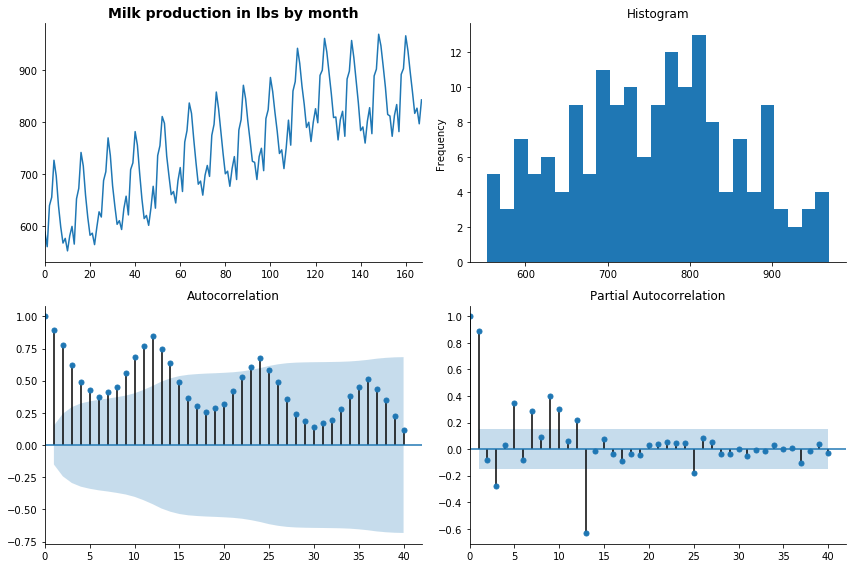

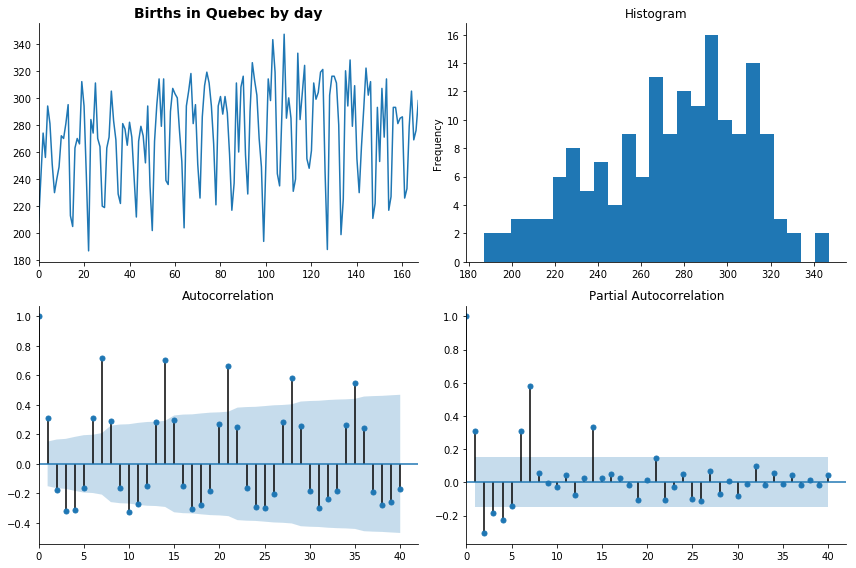

In [25]:
# for each series, plot a time series, histogram, autocorr, and partial autocorr
num_var = len(series.iloc[1,:])
for i in range(0, num_var):
    tsplot2(series.iloc[:,i].dropna(), title=series.columns[i], lags=40)